# 4-Feature Extraction: TF x IDF

- **Goal:** Prediction Recognition

- **Purpose:** Models cannot learn textual data, thus must convert data to what model can learn. That is numerical data. So, feature extraction is the process of doing this conversion from textual data to numerical data. TF (Text Frequency) x IDF (Inverse Document Frequency)

- **Core Idea of TF x IDF:** reflect how important a word is to an instance in the dataset [1]

- **Misc:**
    - `%store`: Cell magic will store the variable of interest so we can load in another notebook

In [1]:
import os
import sys

import pandas as pd

from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from feature_extraction import TfidfFeatureExtraction

In [2]:
%store -r shuffled_df
%store -r shuffled_cleaned_df
pd.set_option('max_colwidth', 800)

In [10]:
clean_data = True

if clean_data:
    shuffled_base_df = shuffled_cleaned_df
else: 
    shuffled_base_df = shuffled_df

shuffled_base_df

,Base Predictions,Prediction Label
0,"on thursday, september 19, 2024, mia patel speculates that the dividend payout ratio at coca-cola (ko) will probably remain at 75% in q1 of 2026.",1
1,the city has a large population.,0
2,"on thursday, april 18, 2024, jackson lee forsees that the total debt at intel (intc) will probably decrease by 10% to $20 billion in q1 of 2029.",1
3,the color blue is often associated with calmness.,0
4,the music is playing loudly in the room.,0
5,the book fell off the table.,0
6,"on tuesday, november 19, 2024, ava lee predicts that the operating cash flow at exxonmobil (xom) should decrease by 5% to $20 billion in q2 of 2027.",1
7,"on monday, december 16, 2024, detravious forecasts that the revenue at apple will rise by 8% to $120 per share in q1 of 2025.",1
8,"on tuesday, june 18, 2024, detravious martin predicts that the capital expenditures at unitedhealth group (unh) should decrease by 3% to $2 billion in q2 of 2028.",1
9,"on friday, august 16, 2024, logan white predicts that the research and development expenses at pfizer (pfe) may increase by 8% to $10 billion in fy 2029.",1


- Document = each row
- Corpus = entire column

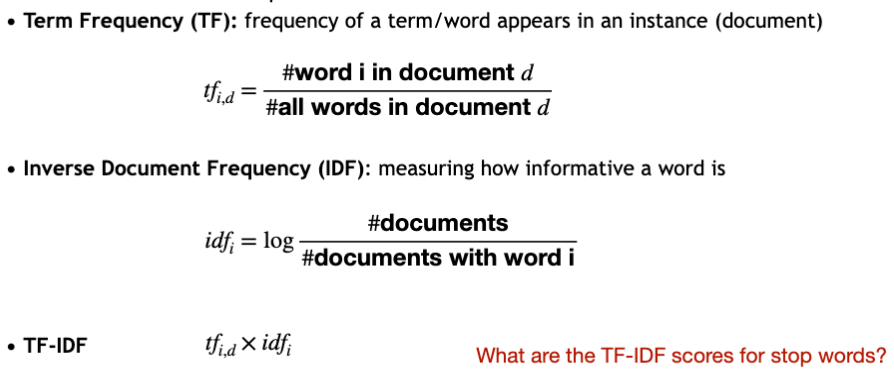

In [11]:
Image(filename='../misc/tfidf.png')

- `fit_transform()`: vectorizes the text data by converting it into numerical form.
    - `fit()`: Learns the vocab and IDF
    - `transform()`: Converts the text data into a matrix of TF-IDF features using `fit()`
    - vectorize each row
    - output:
        - stored elements: #TF-IDF scores (thus not 0)  
        - rows: The #rows/#documents
        - columns: The #columns/#unique terms (features) in the entire corpus
            - NOT the same as the input #columns
            - NOTE: Changes as the generated predictions and non-predictions change (due to running code to generate evertime this notebook is ran).

In [12]:
tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df)
tfidf_vectorized_features = tf_idf_feature_extractor.feature_extraction()
tfidf_vectorized_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 291 stored elements and shape (18, 163)>

In [13]:
tfidf_vectorized_scores_df = tf_idf_feature_extractor.feature_scores()
tfidf_vectorized_scores_df

,000,10,120,15,16,18,19,20,2024,2025,...,tuesday,unh,unitedhealth,wednesday,white,will,with,working,wrote,xom
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20384,0.000000,0.117602,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.154192,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.215239,0.000000,0.000000,0.000000,0.193481,0.00000,0.215239,0.124179,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.162814,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388944,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.21716,0.217160,0.125287,0.000000,...,0.217160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248101
7,0.00000,0.000000,0.271669,0.000000,0.237789,0.000000,0.00000,0.000000,0.137189,0.271669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.179872,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.200937,0.00000,0.000000,0.128964,0.000000,...,0.223534,0.255382,0.255382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.206081,0.000000,0.000000,0.206081,0.000000,0.00000,0.000000,0.118895,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.235443,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
%store shuffled_base_df
%store tfidf_vectorized_features

Stored 'shuffled_base_df' (DataFrame)
Stored 'tfidf_vectorized_features' (csr_matrix)


# References

1. LECTURE: [Text Classification](https://www.notion.so/detraviousjbrinkley/L2-Text-Classification-09badf17ee434145b02014e4b6d63309?pvs=4#4ee7f90851444a989e61cb0bdaa2d965) by Xuezhe Ma, Spring 2024 Professor of CSCI-544: Applied Natural Language Processing (NLP) at the University of Southern California